In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} # How we wish to appear to CL
url = 'https://charlottesville.craigslist.org/search/msa?purveyor=owner#search=1~gallery~0~0' # The page we want to scrape (instruments on craiglist)
raw = requests.get(url,headers=header) # Get page

In [29]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings of the kind we want

In [39]:
import re # Regular expressions

instruments = ['guitar','bass','drums','drum','piano','keyboard','microphone','mic','saxophone',
              'trumpet','oboe','tuba','clarinet','flute','amp','banjo','']

data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    # Assuming 'brands' is a list of instrument brands:
    hits = [word for word in words if word in instruments]  # Changed brands to instruments
    if len(hits) == 0:
        instrument = 'missing' # Assign 'instrument', not 'brand'
    else:
        instrument = hits[0] # Assign 'instrument', not 'brand'
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'instrument':instrument}) # Changed 'brand' to 'instrument'

In [40]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('craigslist_cville_cars.csv') # Save data
df.head()

(129, 6)


,title,price,year,link,instrument,age
0,esp ltd m-1000 ebony,750,NaN,https://charlottesville.craigslist.org/msg/d/c...,missing,NaN
1,gibson les paul faded (2018),900,2018.0,https://charlottesville.craigslist.org/msg/d/c...,missing,7.0
2,hand pan hang drum symphonic steel,2500,NaN,https://charlottesville.craigslist.org/msg/d/c...,drum,NaN
3,"esp edwards alexi laiho ""geeny""",1400,NaN,https://charlottesville.craigslist.org/msg/d/c...,missing,NaN
4,guitar maintenance accessories assortment,30,NaN,https://charlottesville.craigslist.org/msg/d/c...,guitar,NaN


count     129.000000
mean      444.062016
std       695.112567
min         0.000000
25%        50.000000
50%       175.000000
75%       600.000000
max      5000.000000
Name: price, dtype: float64


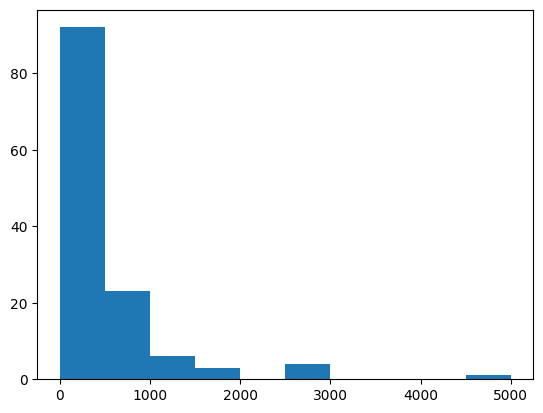

count    16.000000
mean     37.875000
std      14.836329
min       7.000000
25%      28.750000
50%      43.500000
75%      49.000000
max      55.000000
Name: age, dtype: float64


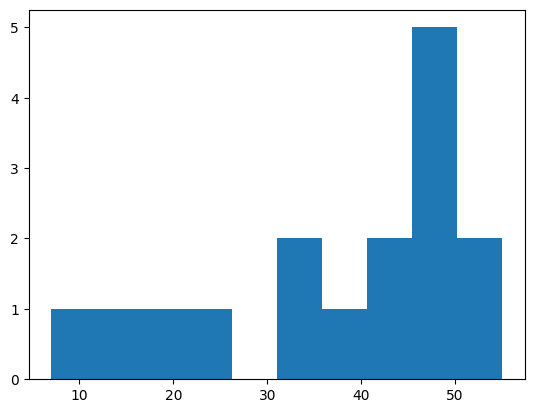

In [41]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [43]:
# Price by brand:
df.loc[:,['price','instrument']].groupby('instrument').describe()

price                                                             \
           count         mean          std    min      25%     50%      75%   
instrument                                                                    
amp          7.0   467.857143   900.286330   40.0    75.00   125.0   230.00   
banjo        2.0  1087.500000  1007.627163  375.0   731.25  1087.5  1443.75   
bass         8.0   182.625000   262.211985    1.0    46.25    75.0   193.75   
drum         3.0  2516.666667  2475.042087   50.0  1275.00  2500.0  3750.00   
guitar      20.0   227.050000   400.754089    0.0    18.25    57.5   300.00   
microphone   2.0   167.500000   130.814755   75.0   121.25   167.5   213.75   
missing     83.0   452.072289   544.672799    1.0    87.50   250.0   662.50   
piano        3.0   108.333333    94.648472    0.0    75.00   150.0   162.50   
trumpet      1.0   100.000000          NaN  100.0   100.00   100.0   100.00   

                    
               max  
instrument          
amp         2500.0  
banjo       1800.0  
bass         800.0  
drum        5000.0  
guitar      1695.0  
microphone   260.0  
missing     2800.0  
piano        175.0  
trumpet      100.0

In [45]:
# Age by brand:
df.loc[:,['age','instrument']].groupby('instrument').describe()

age                                                
           count  mean        std   min   25%   50%    75%   max
instrument                                                      
amp          1.0  49.0        NaN  49.0  49.0  49.0  49.00  49.0
banjo        1.0  55.0        NaN  55.0  55.0  55.0  55.00  55.0
bass         0.0   NaN        NaN   NaN   NaN   NaN    NaN   NaN
drum         0.0   NaN        NaN   NaN   NaN   NaN    NaN   NaN
guitar       2.0  35.0   5.656854  31.0  33.0  35.0  37.00  39.0
microphone   0.0   NaN        NaN   NaN   NaN   NaN    NaN   NaN
missing     12.0  36.0  15.937377   7.0  21.0  43.5  48.25  53.0
piano        0.0   NaN        NaN   NaN   NaN   NaN    NaN   NaN
trumpet      0.0   NaN        NaN   NaN   NaN   NaN    NaN   NaN

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


           log_price   log_age
log_price   2.972408 -0.136177
log_age    -0.136177  0.325119
           log_price   log_age
log_price   1.000000 -0.317687
log_age    -0.317687  1.000000


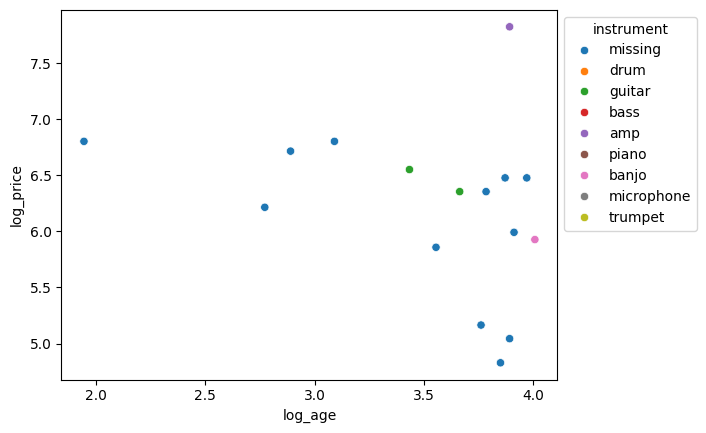

In [47]:
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data=df, x='log_age', y='log_price',hue='instrument')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(df.loc[:,['log_price','log_age']].cov())
print(df.loc[:,['log_price','log_age']].corr())